# CATS AND DOGS DATASET

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [76]:
PATH = "/home/prince/Downloads/kagglecatsanddogs/PetImages"
CATEGORIES = ["Cat", "Dog"]

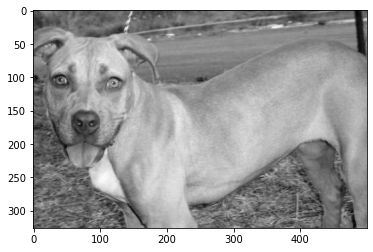

In [77]:
for category in CATEGORIES:
    path = os.path.join(PATH, category)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_arr, cmap = "gray")
        break

In [78]:
img_arr

array([[122, 122, 119, ..., 127, 123, 123],
       [120, 119, 117, ..., 124, 122, 122],
       [117, 116, 115, ..., 122, 121, 121],
       ...,
       [ 86,  98, 113, ..., 143, 143, 144],
       [101, 111, 118, ..., 145, 145, 144],
       [112, 112, 111, ..., 146, 145, 145]], dtype=uint8)

In [79]:
img_arr.shape

(326, 500)

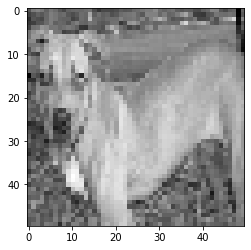

In [80]:
IMG_SIZE = 50
new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_arr, cmap = "gray")

In [81]:
data_array = []

def prepare_dataset():
    for category in CATEGORIES:
        path = os.path.join(PATH, category)
        label = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                data_array.append([new_img_arr, label])
            except Exception as e:
                pass

In [82]:
prepare_dataset()

In [83]:
len(data_array)

24946

In [84]:
import random

random.shuffle(data_array)

In [85]:
for data in data_array[:14]:
    print(data[1])

0
1
0
1
0
0
1
1
0
0
1
0
1
0


In [86]:
X = []
y = []

for features, target in data_array:
    X.append(features)
    y.append(target)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [87]:
X

array([[[[174],
         [180],
         [187],
         ...,
         [170],
         [167],
         [165]],

        [[156],
         [182],
         [187],
         ...,
         [169],
         [166],
         [166]],

        [[ 92],
         [155],
         [187],
         ...,
         [169],
         [168],
         [166]],

        ...,

        [[101],
         [ 62],
         [ 76],
         ...,
         [134],
         [133],
         [133]],

        [[ 66],
         [ 71],
         [ 52],
         ...,
         [132],
         [131],
         [130]],

        [[ 35],
         [ 53],
         [ 61],
         ...,
         [130],
         [131],
         [129]]],


       [[[ 25],
         [ 28],
         [ 30],
         ...,
         [ 66],
         [ 63],
         [ 61]],

        [[ 25],
         [ 27],
         [ 27],
         ...,
         [ 68],
         [ 64],
         [ 61]],

        [[ 46],
         [ 44],
         [ 44],
         ...,
         [ 68],
         [

In [88]:
import pickle

In [89]:
output_file = open("X.pickle", "wb")
pickle.dump(X, output_file)
output_file.close()

output_file = open("y.pickle", "wb")
pickle.dump(y, output_file)
output_file.close()